### K-Nearest Neighbors

##### 2020710058 Applied Data Science Doo-Yeong Lee

In [2]:
# Load Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import warnings
#warnings.filterwarnings('ignore')

In [3]:
# Load Data and Make a Dataset
df = pd.DataFrame(load_boston().data, columns = load_boston().feature_names)
df['TARGET'] = load_boston().target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
TARGET     506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
i1 = np.random.choice(a=df.index, size = 35)
i2 = np.random.choice(a=df.index, size = 20)

In [6]:
df.loc[i1, 'INDUS'] = np.nan
df.loc[i2, 'TAX'] = np.nan

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      472 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        488 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
TARGET     506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 3)
imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(imputed, columns = df.columns)
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
TARGET     506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


##### Find Optimized K for imputation

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))

In [16]:
def optimize_k(data, target):
    errors = []
    
    for k in range(1, 20, 2):
        imputer = KNNImputer(n_neighbors = k)
        imputed = imputer.fit_transform(data)
        df_imputed = pd.DataFrame(imputed, columns = df.columns)
        
        X = df_imputed.drop(target, axis = 1)
        y = df_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
        
        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = rmse(y_test, preds)
        
        errors.append({'K':k, 'RMSE': error})
    return errors

In [17]:
k_errors = optimize_k(data=df, target='TARGET')

In [18]:
k_errors

[{'K': 1, 'RMSE': 3.0307775987263024},
 {'K': 3, 'RMSE': 2.909921806779115},
 {'K': 5, 'RMSE': 3.0007201521255777},
 {'K': 7, 'RMSE': 2.931810136497688},
 {'K': 9, 'RMSE': 3.2161675783697685},
 {'K': 11, 'RMSE': 2.819926932025152},
 {'K': 13, 'RMSE': 3.0129532935343692},
 {'K': 15, 'RMSE': 3.0163995434760213},
 {'K': 17, 'RMSE': 3.0338723282171216},
 {'K': 19, 'RMSE': 3.0565088424412523}]

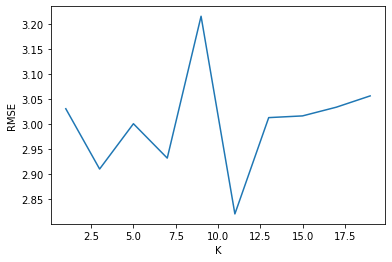

In [21]:
import seaborn as sns

sns.lineplot(pd.DataFrame(k_errors)['K'], pd.DataFrame(k_errors)['RMSE'])